In [11]:
import gymnasium as gym
import pygame
import sys
import argparse
from tools.qlearning import *
import numpy as np
import matplotlib.pyplot   as plt

In [12]:
env = gym.make("FrozenLake-v1", render_mode=None)
observation, info = env.reset(seed=42)
num_actions = env.action_space.n
num_states = env.observation_space.n

In [29]:

import numpy as np
from tqdm import *

def q_train_greedy(env, alpha=0.99, gamma=0.8, epsilon=0.01, max_n_steps=100, n_episodes=30000, weights="data/q_table.npy"):
    """ Q–learning algorithm (epsilon-greedy)
    
    """
    num_actions = env.action_space.n
    num_states = env.observation_space.n
    
    try :
        print("Loading Q-table saved weights...")
        q_table = np.load(weights)

    except :
        print("Error loading Q-table saved weights")
        print("Initiating new Q-table...")
        q_table = np.zeros((num_states, num_actions))

    rewards = []

    print("Starting Q-learning algorithm...")
    for _ in trange(n_episodes):
        s = env.reset()[0]
        total_reward = 0
        for i in range(max_n_steps):
            U = np.random.uniform(0, 1)
            if U < epsilon:
                a = env.action_space.sample() # selecting action a at random from A 
            else:
                a = np.argmax(q_table[s]) # Select action a given s (state) following policy derived from q;
            
            s_new, r, done, _ , _= env.step(a)
            
            # Update Q-table
            q_table[s, a] = (1-alpha)*q_table[s, a] + alpha*(r + gamma*np.max(q_table[s_new]))
            
            # update state and total reward
            s, total_reward = s_new, total_reward+r

            # if s is a terminal state then go to next episode;
            if done: 
                rewards.append(total_reward) 
                break
            
    env.close()
    print("Finished Q-learning algorithm.")
    print("Average reward is : {}".format(np.mean(rewards)))

    return q_table

In [30]:
q_table = q_train_greedy(env)

Loading Q-table saved weights...
Starting Q-learning algorithm...


100%|██████████| 30000/30000 [00:29<00:00, 1028.47it/s]

Finished Q-learning algorithm.
Average reward: 0.4216425655573237


In [40]:
def agent_play(env,max_n_episodes=30000, max_steps=100):
    count = 0
    rewards = []
    num_steps = []
    for _ in trange(max_n_episodes):
        s = env.reset()[0]
        total_reward = 0
        for i in range(max_steps):
            a = np.argmax(q_table[s, :])
            s, r, done, _,_ = env.step(a)
            total_reward+=r
            if done: 
                rewards.append(total_reward)
                num_steps.append(i+1)
                count+=1
                break
    success_rate = np.mean(rewards)
    avg_num_steps = np.mean(num_steps)
    print(f'Success rate is = {100*success_rate} %')
    print(f'Average number of steps to succed is = {avg_num_steps}')
    return rewards, success_rate, avg_num_steps


In [41]:
rewards, success_rate, avg_num_steps = agent_play(env)

100%|██████████| 30000/30000 [00:18<00:00, 1584.28it/s]

Success rate is = 68.00472255017709 %
Average number of steps to succed is = 37.124825587635506


/tmp/ipykernel_737042/658659532.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(len(rewards)), np.cumsum(rewards)/np.arange(len(rewards)))


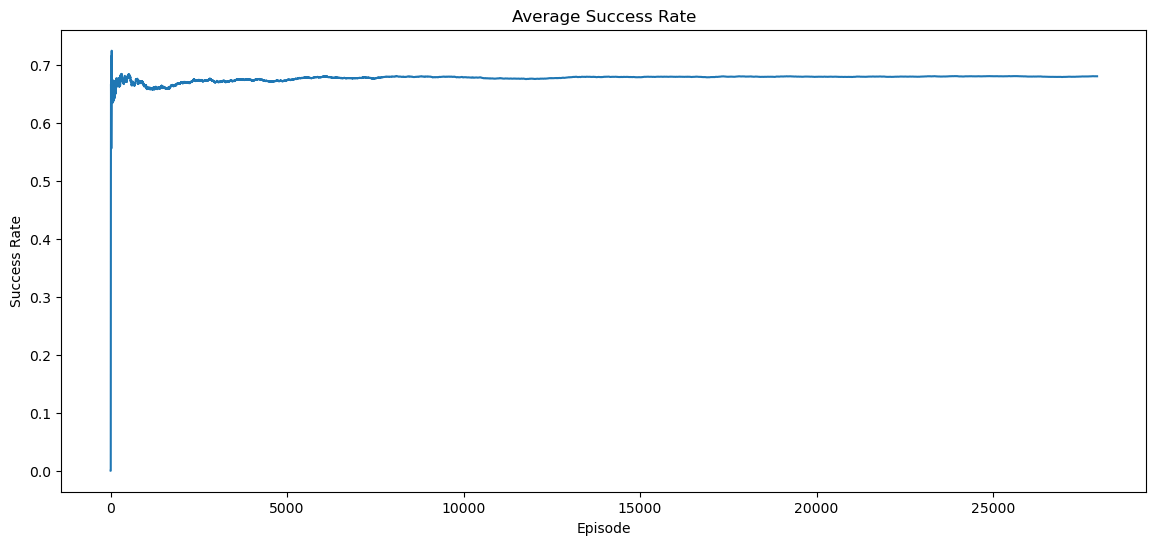

In [61]:
fig, axes = plt.subplots(figsize=(14, 6))
plt.plot(np.arange(len(rewards)), np.cumsum(rewards)/np.arange(len(rewards)))
axes.set(xlabel='Episode', ylabel='Success Rate', title='Average Success Rate')
plt.show()